In [ ]:
import pandas as pd
import music_recommend

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#emotion = { "joy":0.2, "excitement":0.5, "gratitude":0.7 }
emotion = { "grief":0.2, "curiosity":0.5, "disapproval":0.7 }

music_recommend.get_music(emotion, None, None, True)

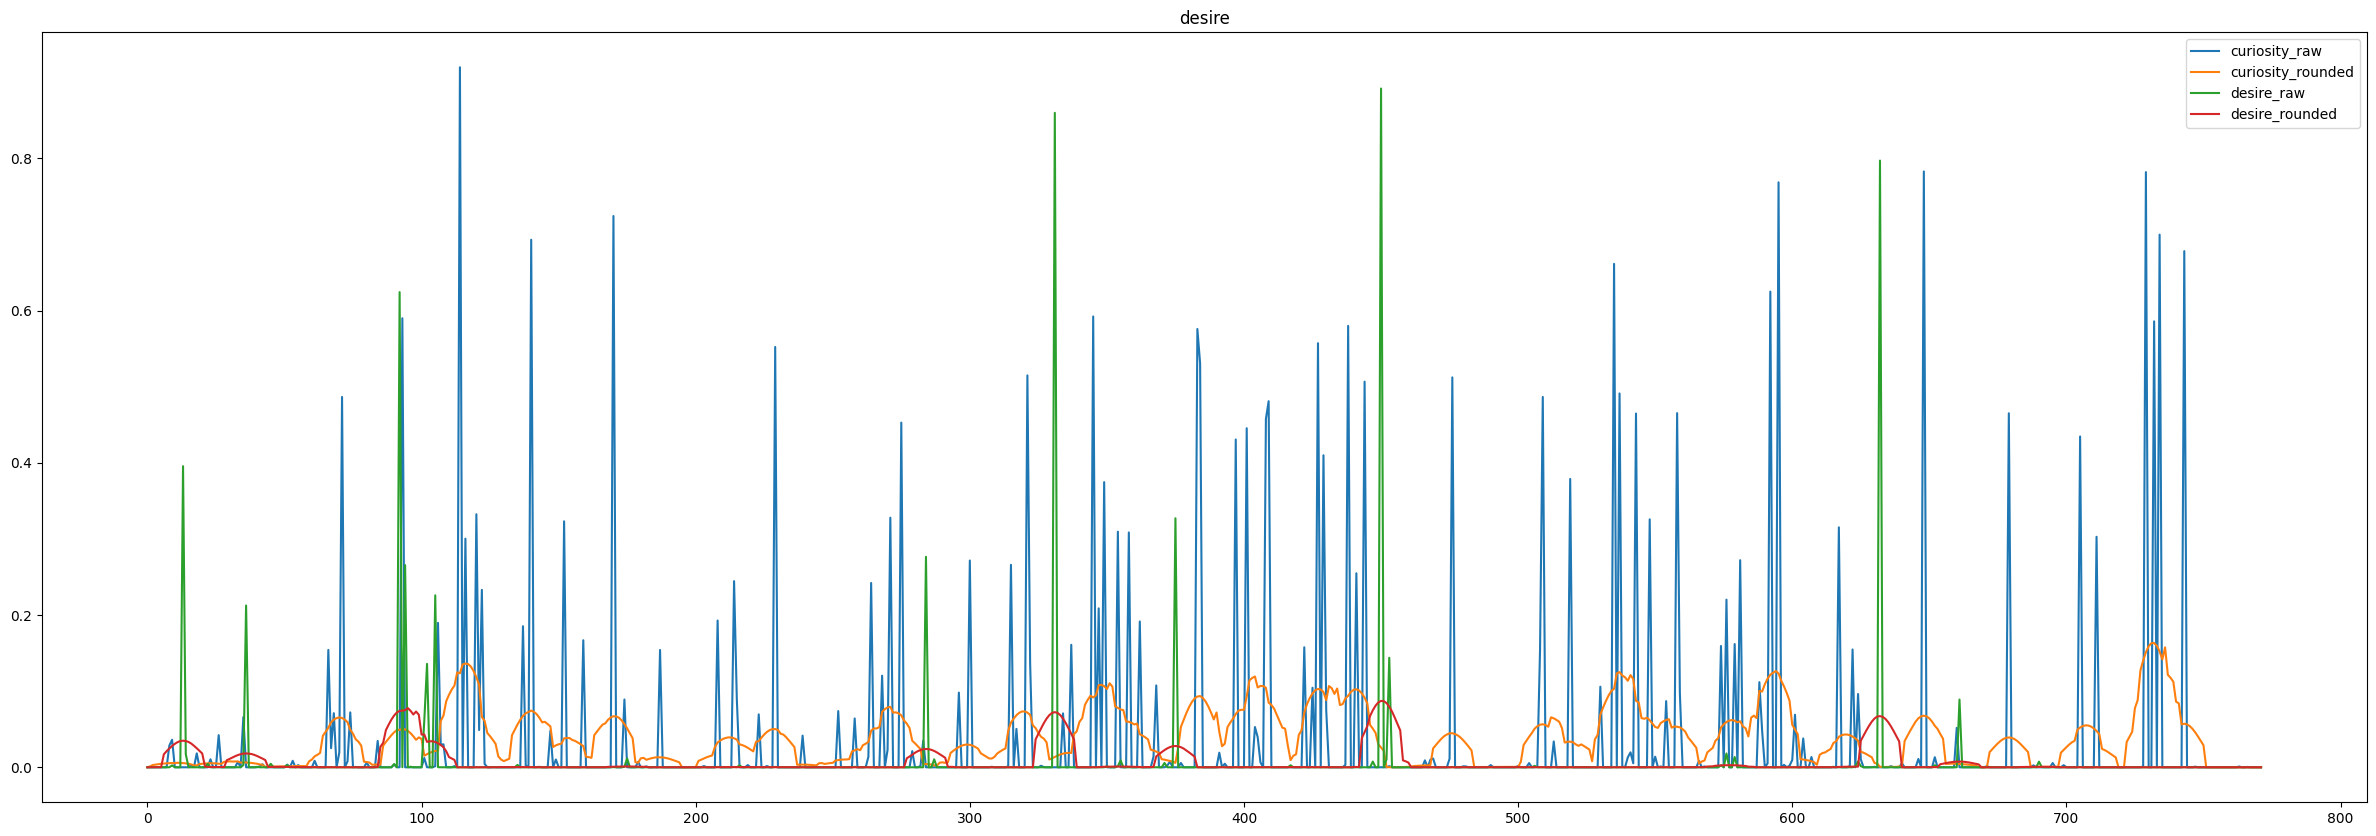

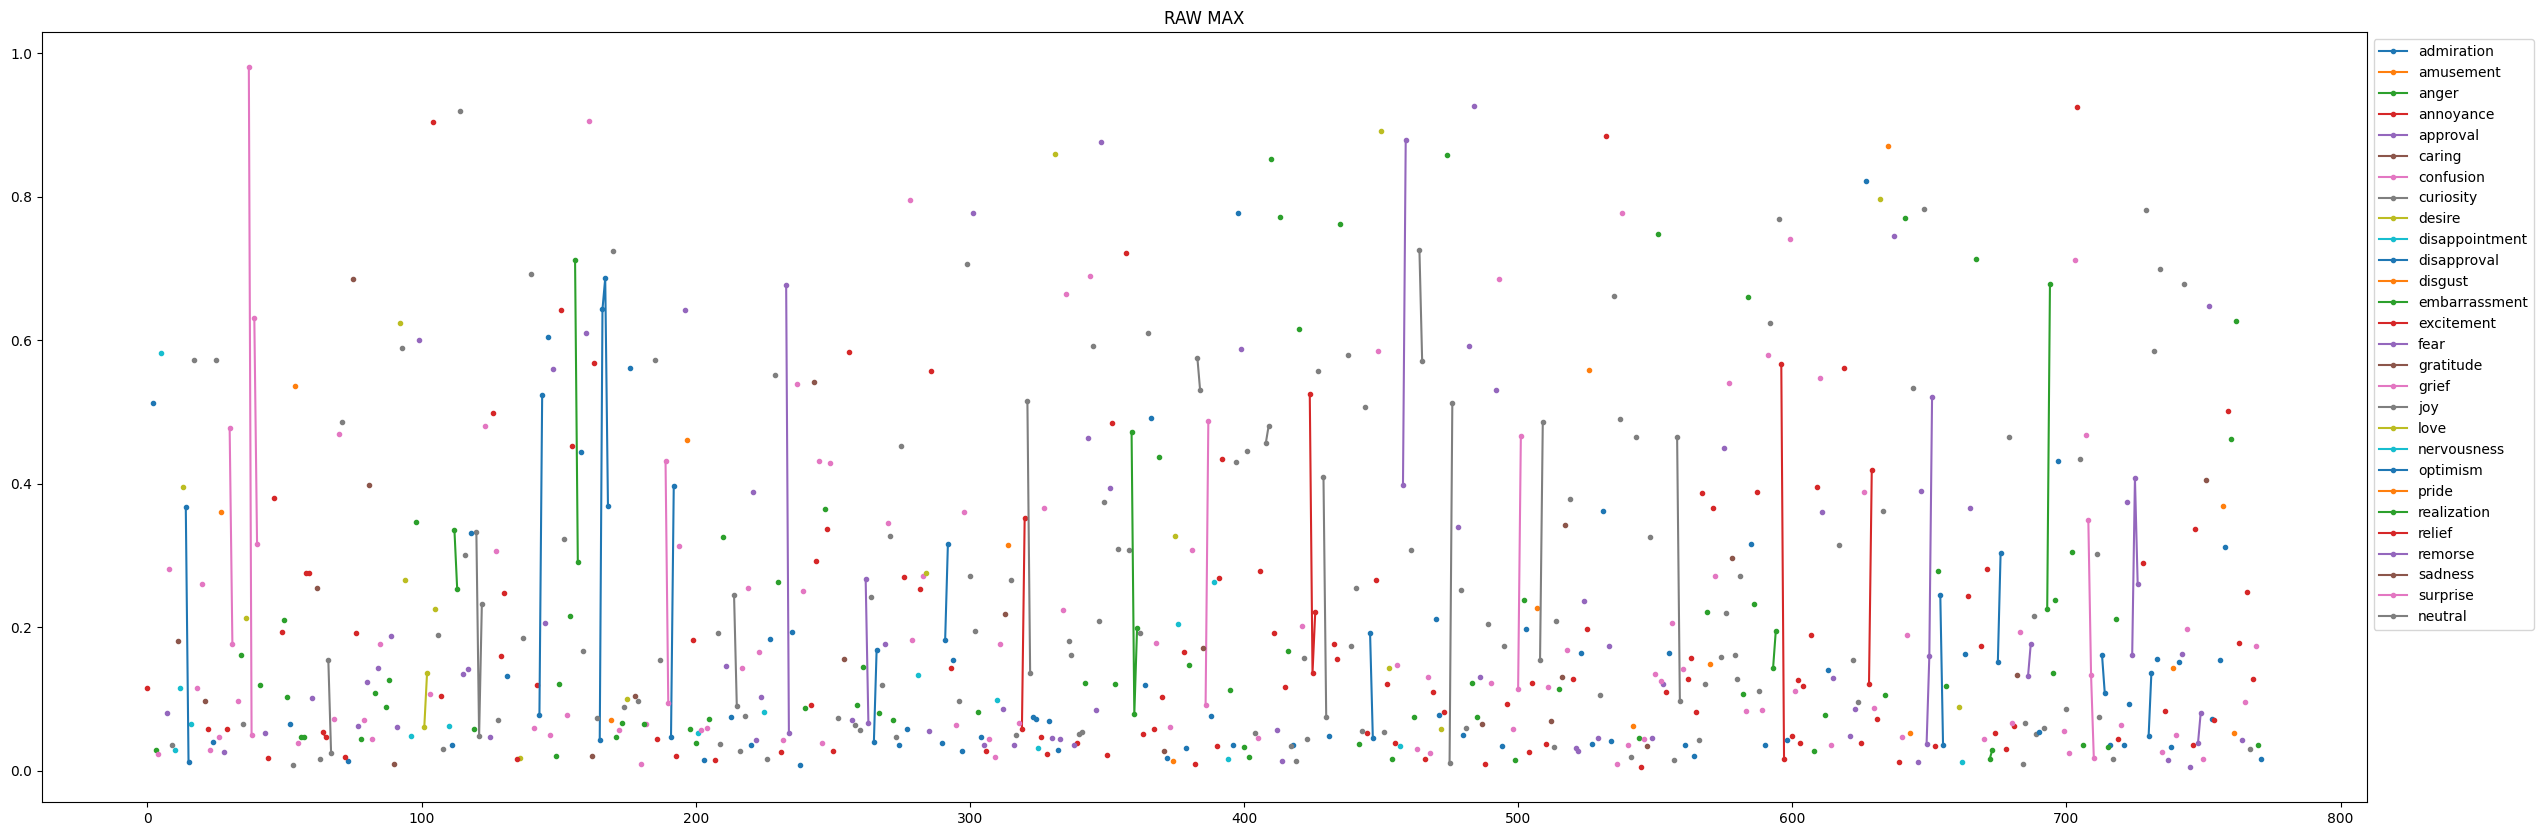

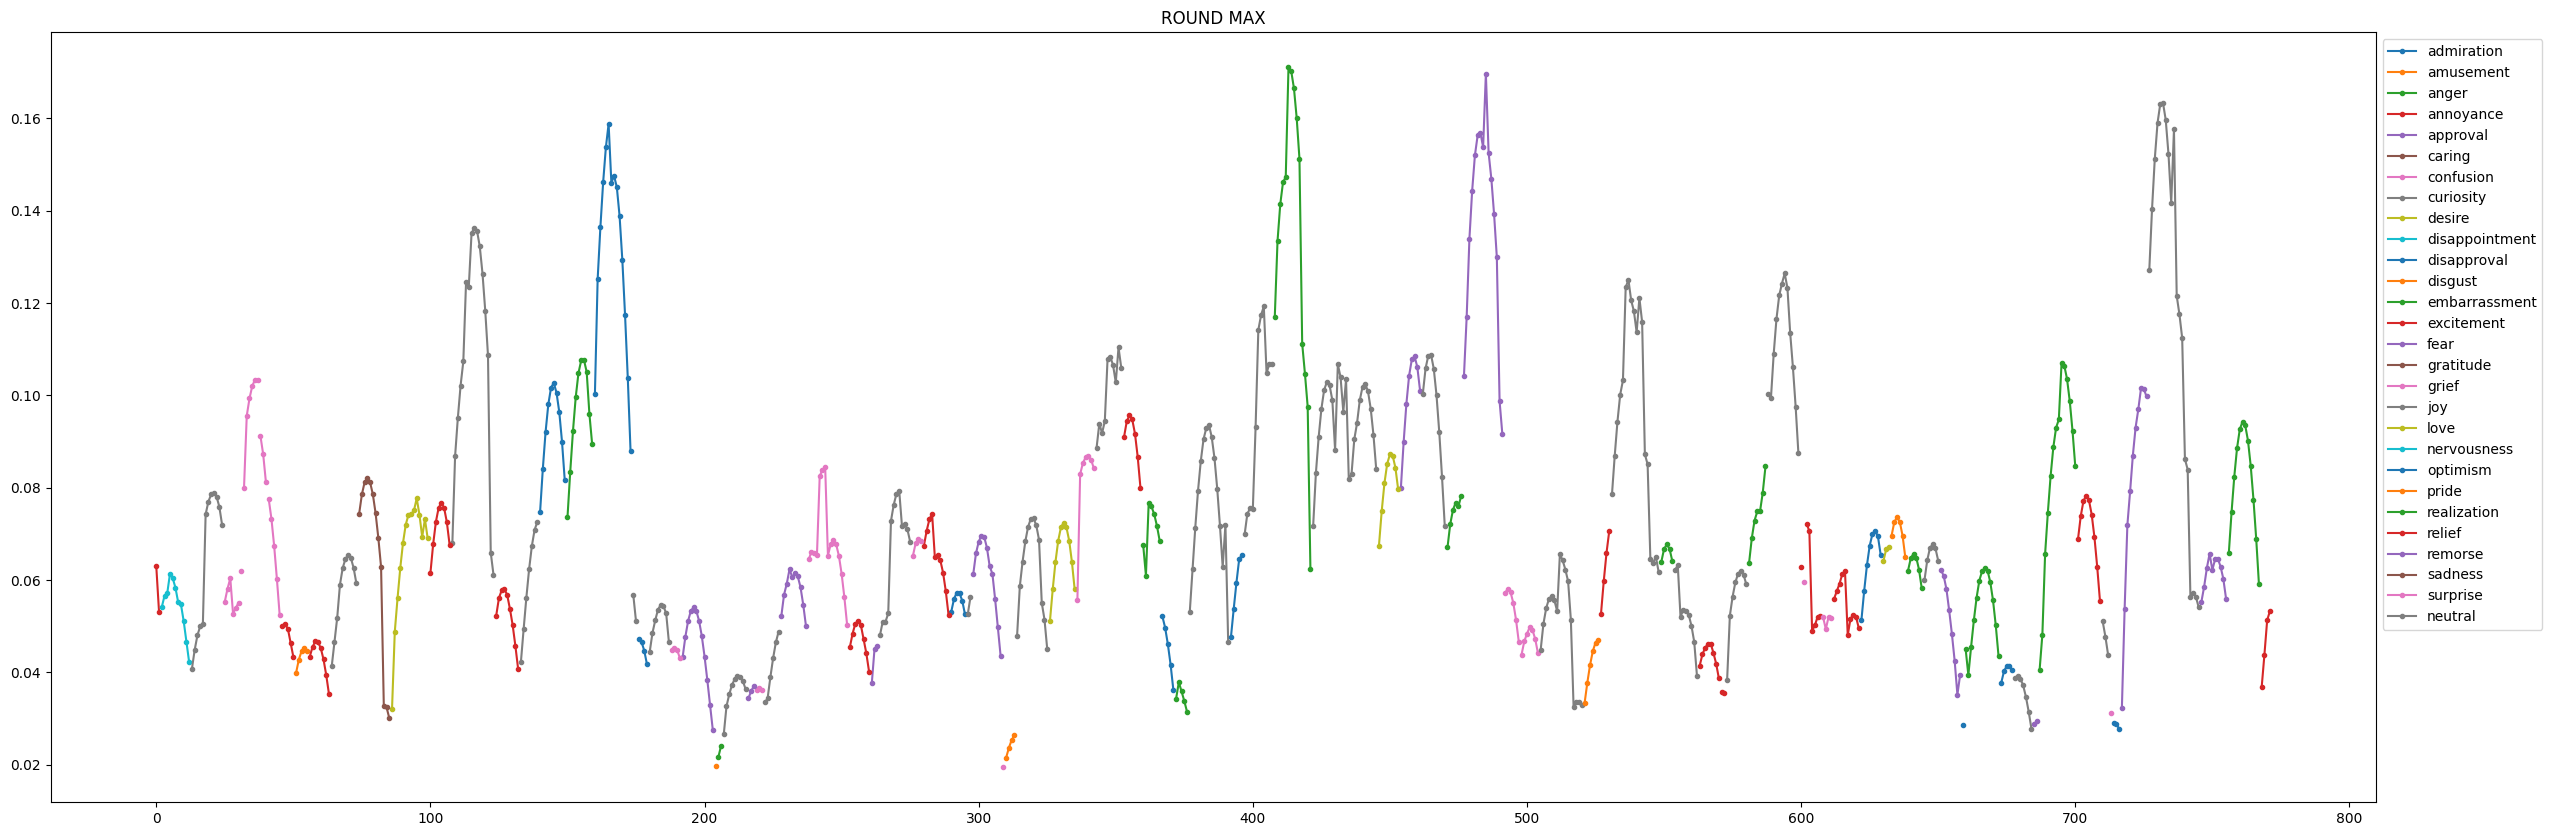

In [15]:
import json
import matplotlib.pyplot as plt
import numpy as np

EMOTION = ['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral']

# WINDOW SHAPE FUNCTIONS
def normal_dist(x, deviation):
    y = np.exp(-0.5*(x/deviation)**2)
    return y / sum(y)
def rectangle(x):
    return np.ones(shape=np.shape(x)) / len(x)
def pyramid(x):
    y = np.abs(x)
    y = 1 - y / np.max(y)
    return y / np.sum(y)

def get_raw_values(file_name:str):
    with open(file_name, "r", encoding='utf-8') as f:
        jsn = json.load(f)
    data = [i['emotion'] for i in jsn['data']]    
    result = {}

    for E in EMOTION:    
        result[E] = [e[E] if E in e else 0 for e in data]
    max_values = [max(e,key=e.get) for e in data]
    return result, max_values

def round_values(values:dict):
    HALF_SIZE = 7
    shift = np.arange(-HALF_SIZE, HALF_SIZE+1)
    window = normal_dist(shift, 6)
    length = len(values[EMOTION[0]])

    result = {}
    for E in EMOTION:
        origin = values[E]
        temp = np.zeros(length)
        for x, y in zip(shift, window):
            v1 =  np.roll(origin, x)
            if x < 0:
                v1[x:] = v1[x]
            elif x > 0:
                v1[:x] = v1[x]
            temp += v1 * y    
        result[E] = temp
    max_values = [max([E for E in EMOTION],key=lambda E : result[E][i]) for i in range(length)]
    return result, max_values

file = 'raw/1.json'
raw, raw_max = get_raw_values(file)
rounded, rounded_max = round_values(raw)

plt.figure(figsize=(30,10))
for e in ['curiosity', 'desire']:
    plt.plot(raw[e], '-', label = e + '_raw')
    plt.plot(rounded[e], '-', label = e + '_rounded')
    plt.legend(bbox_to_anchor=(1,1))
plt.show()

plt.figure(figsize=(30,10))
plt.title('RAW MAX')
for E in EMOTION:
    ##l = [e.get[EMO] for e in emotions]
    l = [val if E == raw_max[idx] else np.nan for idx, val in enumerate(raw[E])]
    plt.plot(l, '.-', label = E)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

plt.figure(figsize=(30,10))
plt.title('ROUND MAX')
for E in EMOTION:    
    l = [val if E == rounded_max[idx] else np.nan for idx, val in enumerate(rounded[E])]
    plt.plot(l, '.-', label = E)
plt.legend(bbox_to_anchor=(1,1))
plt.show()